# Presentatie

## Opdracht A: CO2 emissies, GDP en hernieuwbare energie

## Groep: Andre & Andries Jan

## Gebruikte datasets

- Renewable energy consumption: https://data.worldbank.org/indicator/EG.FEC.RNEW.ZS 
- GDP per capita: https://data.worldbank.org/indicator/NY.GDP.PCAP.KD 
- CO2 emissions: https://data.worldbank.org/indicator/EN.ATM.CO2E.KT

## Vraag 1: Welke landen laten de sterkste stijgende trend zien in CO2 emissies? En welke landen juist een dalende?

### Laden datasets met behulp van de pandas datareader package 

In [4]:
#Download co2 data from the World Bank API into a dataframe

co2_wb = wb.download(
                    #Use the indicator attribute to identify which indicator or indicators to download
                    #CO2 emission (kilotonnes)
                    indicator='EN.ATM.CO2E.KT',
                    #Use the country attribute to identify the countries you want data for
                    country=['all'],
                    #Identify the first year for which you want the data, as an integer or a string
                    start='2010',
                    #Identify the last year for which you want the data, as an integer or a string
                    end=2014
                )
co2_wb.index
co2_wb = co2_wb.reset_index(level=['year'])
co2_wb.columns = ['year','emission']
co2_wb['year'] = pd.to_numeric(co2_wb['year'])

#Show the head of the dataframe 
co2_wb.head()

year      emission
country                       
Arab World  2014  1.895700e+06
Arab World  2013  1.775096e+06
Arab World  2012  1.796962e+06
Arab World  2011  1.655808e+06
Arab World  2010  1.645559e+06

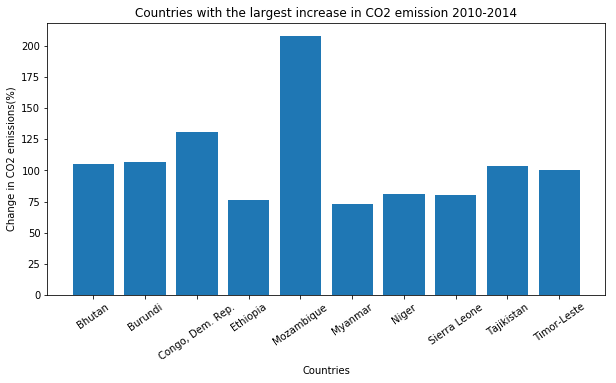

In [7]:
# Maak barplot
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.bar(stijgers.country, stijgers['change(%)'])
ax.set_xlabel('Countries')
ax.set_ylabel('Change in CO2 emissions(%)')
ax.set_title('Countries with the largest increase in CO2 emission 2010-2014')
plt.xticks(rotation=35)
plt.show()

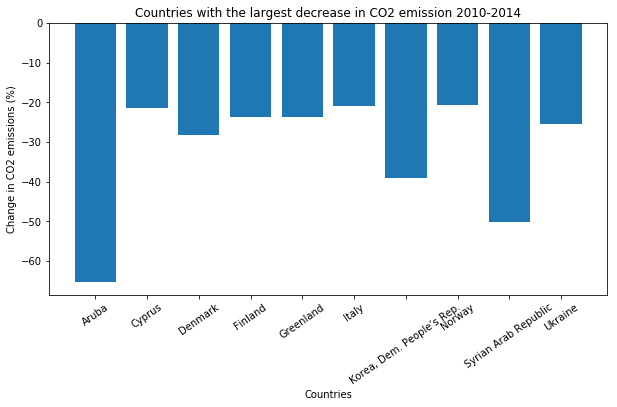

In [10]:
# Maak barplot
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.bar(dalers.country, dalers['change(%)'])
ax.set_xlabel('Countries')
ax.set_ylabel('Change in CO2 emissions (%)')
ax.set_title('Countries with the largest decrease in CO2 emission 2010-2014')
plt.xticks(rotation=35)
plt.show()

### Antwoord: 
- De top 5 landen met de sterkst stijgende trend in CO2 emissies in de periode 2010-2014 zijn: Mozambique, Congo, Burundi, Bhutan, Tajikistan
- De top 5 landen met de sterkst dalende trend in CO2 emissies in de periode 2010-2014 zijn: Aruba, Syrie, Noord-Korea, Denemarken, Ukraine

## Vraag 2: Kun je (dmv visualisatie) een verband ontdekken tussen CO2 emissies en GDP?

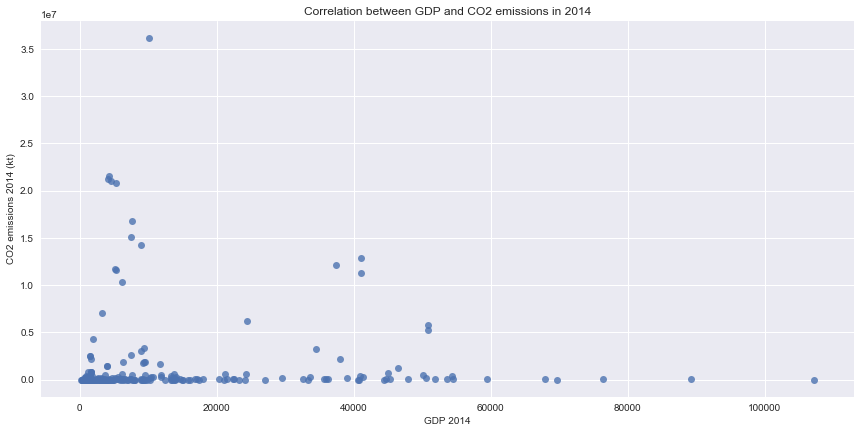

In [15]:
#Grafiek genereren
sns.set(rc={"font.size":8,"axes.labelsize":10})
p = sns.lmplot(x='gdp_2014', y='co2_emission_2014', fit_reg= False, data=df_co2_gdp, size=6, aspect = 2)
p = (p.set_axis_labels('GDP 2014', 'CO2 emissions 2014 (kt)'))
plt.title('Correlation between GDP and CO2 emissions in 2014')

plt.show()

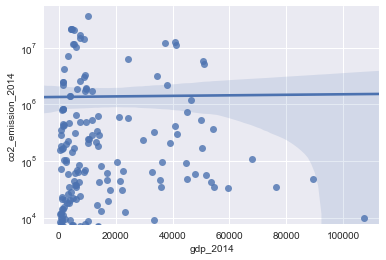

In [16]:
# Inzoomen
ax = sns.regplot(x='gdp_2014', y='co2_emission_2014', data=df_co2_gdp)
ax.set_yscale('log')

plt.show()

In [17]:
# Correlatie
df_co2_gdp['gdp_2014'].corr(df_co2_gdp['co2_emission_2014'])

0.006322167357014034

### Antwoord: 
- Er is geen duidelijk verband tussen CO2 emissies en GDP in 2014

## (Vraag 2 Optioneel)
- Analyse van verband tussen CO2 emissies en GDP, onderverdeeld in inkomensgroepen

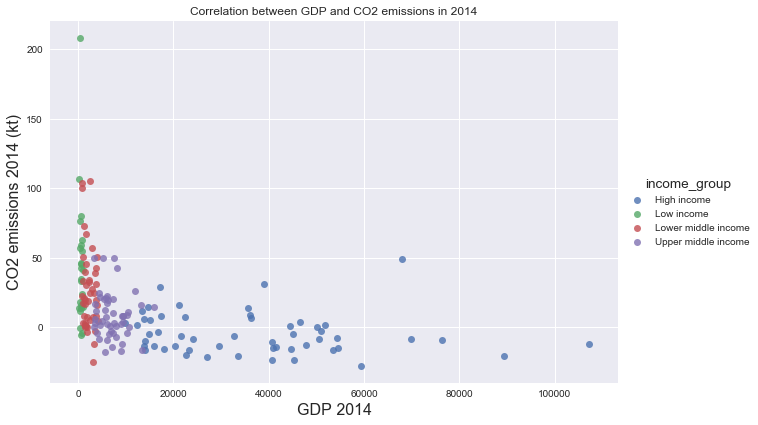

In [25]:
# Show plot again with hue = income group

sns.set(rc={"font.size":16,"axes.labelsize":16})
p = sns.lmplot(x='gdp_2014', y='change(%)', hue = 'income_group', fit_reg= False, data=df_co21, size=6, aspect = 1.5)
p = (p.set_axis_labels('GDP 2014', 'CO2 emissions 2014 (kt)'))
plt.title('Correlation between GDP and CO2 emissions in 2014')

plt.show()

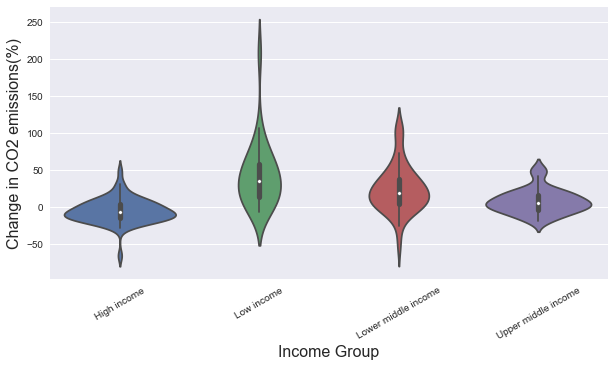

In [26]:
# Toon spreiding trend in CO2 uitstoor per inkomensgroep
fig, ax = plt.subplots(figsize=(10,5))
sns.set(rc={"font.size":16,"axes.labelsize":16})
#p = sns.swarmplot(x= 'income_group', y= 'change(%)', alpha=.4, color='black', data = df_co21)
p = sns.violinplot(ax=ax, x= 'income_group', y= 'change(%)', data = df_co21)
ax.set(xlabel= 'Income Group', ylabel='Change in CO2 emissions(%)')
p.set_xticklabels(p.get_xticklabels(), rotation=30)
plt.show()

## Vraag 3: Kun je (dmv visualisatie) een verband ontdekken tussen CO2 emissies en het percentage energie opgewekt uit hernieuwbare bronnen?

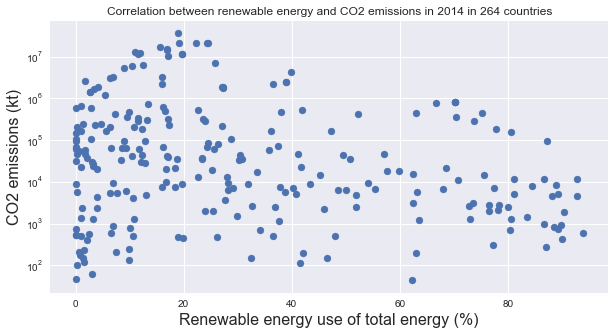

In [32]:
#Grafiek genereren
fig0, axes = plt.subplots(1, 1, figsize=(10,5))
axes.scatter(df_renewable['renewable 2014'], df_co2_worldbank['co2 emissies 2014'])
axes.set_xlabel('Renewable energy use of total energy (%)')
axes.set_ylabel('CO2 emissions (kt)')
axes.set_title('Correlation between renewable energy and CO2 emissions in 2014 in 264 countries')
#Instellen van y-as scale
axes.set_yscale('log')

### Antwoord:
- Er is niet een duidelijk verband tussen CO2 emissies en het percentage energie opgewekt uit hernieuwbare bronnen in 2014




## (Vraag 3 Optioneel)
- Analyse van verband tussen trend van stijging/daling van CO2 emissies in de periode 2010-2014 en het percentage energie opgewekt uit hernieuwbare bronnen in 2014

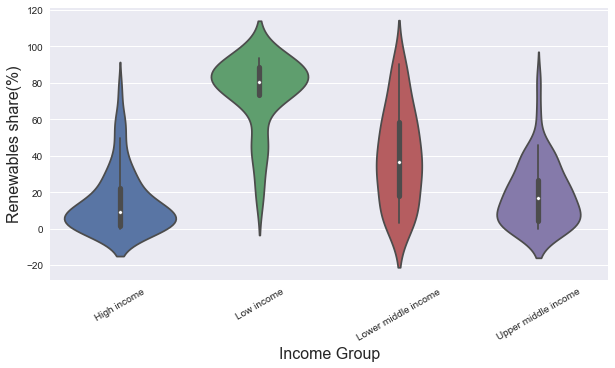

In [42]:
# Plot met spreiding aandeel duurzame energie per inkomensgroep

fig, ax = plt.subplots(figsize=(10,5))
sns.set(rc={"font.size":16,"axes.labelsize":16})
#p = sns.swarmplot(x= 'income_group', y= 'renewable 2014', alpha=.4, color='black', data = df_energy)
p = sns.violinplot(x= 'income_group', y= 'renewable 2014', data = df_energy)
p.set_xticklabels(p.get_xticklabels(), rotation=30)

ax.set(xlabel= 'Income Group', ylabel='Renewables share(%)')
p.set_xticklabels(p.get_xticklabels(), rotation=30)
plt.show()

plt.show()

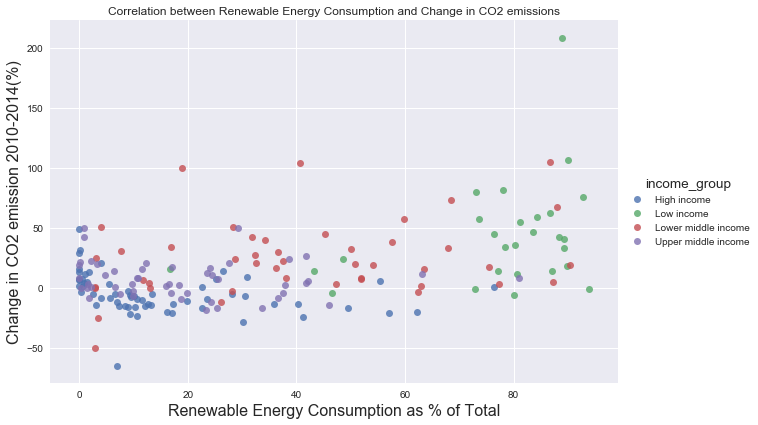

In [43]:
# Scatterplot met correlatie Aandeel duurzame energie en Verandering in CO2 uitstoot
sns.set(rc={"font.size":16,"axes.labelsize":16})
p =  sns.lmplot(x='renewable 2014', y='change(%)', hue = 'income_group', fit_reg= False, data=df_energy, size=6, aspect = 1.5)
p = (p.set_axis_labels('Renewable Energy Consumption as % of Total', 'Change in CO2 emission 2010-2014(%)'))
plt.title('Correlation between Renewable Energy Consumption and Change in CO2 emissions')

plt.show()


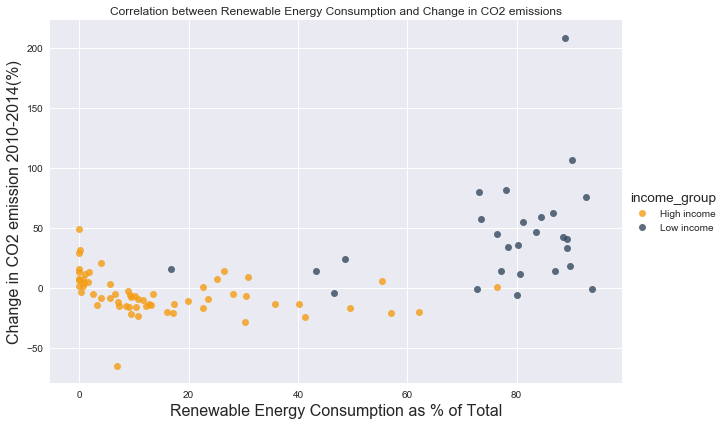

In [45]:
# Toon plot
sns.set(rc={"font.size":16,"axes.labelsize":16})
p =  sns.lmplot(x='renewable 2014', y='change(%)', hue = 'income_group', fit_reg= False, data=df_energy, size=6, aspect = 1.5, 
                palette=sns.color_palette(["#f39c12", "#34495e"]))
p = (p.set_axis_labels('Renewable Energy Consumption as % of Total', 'Change in CO2 emission 2010-2014(%)'))

plt.title('Correlation between Renewable Energy Consumption and Change in CO2 emissions')

plt.show()

### Analyse resultaat:
- Hoge inkomensgroep: Relatief gering aandeel duurzame energie, maar daling of geringe stijging CO2 uitstoot
- Lage inkomensgroep: Relatief groot aandeel duurzame energie, maar relatief sterke stijging CO2 uitstoot

## Vraag 4: Welke landen gebruiken uberhaubt het meeste energie per persoon? En welke het minst?

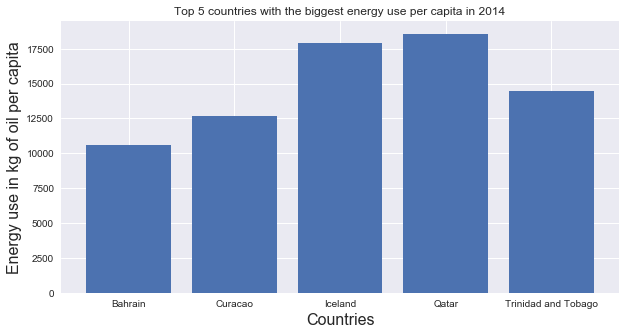

In [36]:
#Grafiek genereren
fig1, axes = plt.subplots(1, 1, figsize=(10,5))
axes.bar(df_energy_capita_max_top.index, df_energy_capita_max_top[2014])
axes.set_xlabel('Countries')
axes.set_ylabel('Energy use in kg of oil per capita')
axes.set_title('Top 5 countries with the biggest energy use per capita in 2014')
plt.show()

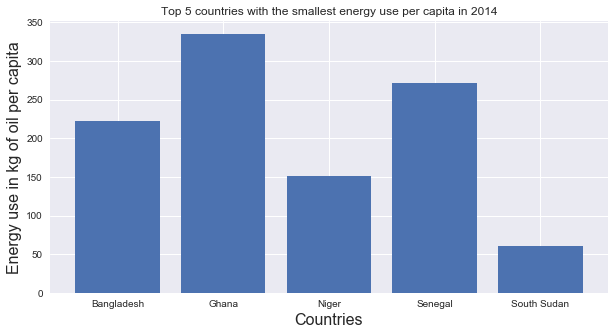

In [38]:
#Grafiek genereren
fig2, axes = plt.subplots(1, 1, figsize=(10,5))
axes.bar(df_energy_capita_min_top.index, df_energy_capita_min_top[2014])
axes.set_xlabel('Countries')
axes.set_ylabel('Energy use in kg of oil per capita')
axes.set_title('Top 5 countries with the smallest energy use per capita in 2014')
plt.show()

### Antwoord: 
- De top 5 landen die in 2014 de meeste energie per persoon gebruiken zijn: Qatar, Ijsland, Trinidad en Tobago, Curacao en Bahrein
- De top 5 landen die in 2014 de minste energie per persoon gebruiken zijn: Zuid-Soedan, Niger, Bangladesh, Senegal en Ghana

## Bevindingen

- Het was niet makkelijk om de excel bestanden van Wereldbank in de dataframe te zetten. We hebben gebruik gemaakt van Python library Datareader. Binnen deze library is er een class voor Wereldbank. Het werkt als API van een website door parameters voor een dataset mee te geven.

- We hebben de dataset van googledocs waarvan wij de oorspronkelijke bron niet kon achterhalen niet gebruikt. In plaats daarvan hebben we zelf de dataset met dezelfde informatie opgezocht in Wereldbank en deze dataset gebruikt. 